In [758]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
import json  # Import the json library for working with JSON data
import warnings  # Import the warnings module to suppress warning messages
warnings.filterwarnings("ignore")  # Ignore warning messages

# calc
import numpy as np  # Import the numpy library for mathematical operations

# plot
import matplotlib.pyplot as plt  # Import the matplotlib library for data visualization
from matplotlib.ticker import FuncFormatter  # Import the FuncFormatter class for custom tick formatting
import matplotlib.gridspec as gridspec  # Import the gridspec module for creating grid layouts
import matplotlib.ticker as ticker
plt.rcParams["font.family"] = "Arial"

# Plot functions

In [759]:
# Define a list of colors using hexadecimal color codes
colors = ['#E64B35FF', '#4DBBD5FF', '#00A087FF', \
          '#3C5488FF', '#F39B7FFF', '#8491B4ff',\
          '#91D1C2FF', '#DC0000FF', '#7E6148FF']


# Load a JSON file named 'colors_19.json' that contains a list of 19 colors (used in plot_b)
with open('fig/colors_19.json') as f:
    colors_19 = json.load(f)[::-1]


# Define the font size for labels and general text
label_size = 10
font_size = 9
marker_size = 3.5

# Define a custom formatting function for displaying numbers with commas
def format_with_commas(value, pos):
    return '{:,.0f}'.format(value)

def format_yaxis_ticker(value, tick_number):
    if value == 0:
        return 0
    return f"{value/1000:.0f}k"


## Figure (A)

Keep a placeholder for image A at its intended position, and finally combine the saved image `fig/A.png` with the generated `combination.pdf`.

## Figure (B)

**Average NSPC of children across different intervals of parents' average years of education.**

The file `data/census_parent_edu_nspc.csv` contains information about educational groups and their corresponding statistics. The columns of the data include:

* `par_edu_group`: This column represents the educational group categories.
* `mean`: The mean column indicates the average NSPC for each educational group.
* `count`: The count column represents the number of persons within each educational group.

In [760]:
def plot_b(ax):
    """
    Plot B: Average NSPC of children across different intervals of parents' average years of education
    
    Args:
        ax (matplotlib.axes.Axes): The subplot axes on which the plot will be drawn.

    Returns:
        None

    Notes:
        - This function requires the 'data/census_parent_edu_nspc.csv' file to be present.
    """

    grouped_par_edu_ticks = [
        'Not in Education',
        'Primary School',
        'Middle School',
        'High School',
        'Associate Degree',
        'Bachelor Degree',
        'Graduate and Above'
    ]

    grouped_par_edu_abb_ticks = {
        'Not in Education': '3',
        'Primary School': '6',
        'Middle School': '9',
        'High School': '12',
        'Associate Degree': '15',
        'Bachelor Degree': '18',
        'Graduate and Above': '21'
    }

    # Read the data from the CSV file containing information about parent education and NSPC
    grouped_par_edu = pd.read_csv('data/census_parent_edu_nspc.csv')

    # Bar plotting
    # Create a twin y-axis for the bar plot
    ax2 = ax.twinx()
    # Create bars representing the number of people in each education group
    ax2.bar(grouped_par_edu['par_edu_group'], grouped_par_edu['count'], color=colors[6], edgecolor="k", alpha=0.2)
    # Set the y-axis label for the bar plot
    ax2.set_ylabel('# People', fontsize=label_size)
    # Format the y-axis tick labels of the bar plot with commas
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
    # Set the font size of the y-axis tick labels of the bar plot
    ax2.tick_params(axis='y', labelsize=font_size) 
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis_ticker))

    # Line plotting
    # Plot a line representing the NSPC (New Startups per Capita) for each education group
    ax.plot(grouped_par_edu['par_edu_group'], grouped_par_edu['mean'], marker='o', color=colors[0], linestyle='-', markersize=marker_size, label='# People', linewidth=1)
    # Set the y-axis label for the line plot
    ax.set_ylabel('NSPC', fontsize=label_size)
    # Set the x-axis label for the line plot
    ax.set_xlabel('Years of Education', fontsize=label_size)
    # Set the tick labels of the x-axis to the defined education group labels
    ax.set_xticklabels([grouped_par_edu_abb_ticks[edu] for edu in grouped_par_edu_ticks])
    # Set the y-axis limits for the line plot
    ax.set_ylim(7.5, 9.9)
    # Set the font size of the x-axis, y-axis tick labels of the line plot
    ax.tick_params(axis='y', labelsize=font_size)
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center', fontsize=font_size)

    # Add annotations to each data point on the line plot
    for i, (x, y) in enumerate(zip(grouped_par_edu['par_edu_group'], grouped_par_edu['mean'])):
        if i % 2 == 1:
            continue
        ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 4), textcoords='offset points', ha='center', va='bottom', fontsize=font_size, color=colors[-1])

    # Adjust the spacing of subplots to prevent overlapping of labels and titles
    plt.tight_layout()

## Figure (C)

**Average NSPC of children across different intervals of parents' average monthly income.**

The file `data/census_parent_income_nspc.csv` contains information about income groups and their corresponding statistics. The columns of the data include:

* `par_income_group`: This column represents the income groups, categorized based on income ranges.
* `mean`: The mean column indicates the average NSPC for each income group.
* `count`: The count column represents the number of persons within each income group.

In [761]:
def plot_c(ax):
    """
    Plot C: Average NSPC of children across different intervals of parents' average monthly income
    
    Args:
        ax (matplotlib.axes.Axes): The subplot axes on which the plot will be drawn.

    Returns:
        None

    Notes:
        - This function requires the 'data/census_parent_income_nspc.csv' file to be present.
    """
        
    # Read the data from the 'census_parent_income_nspc.csv' file into a DataFrame
    grouped_par_income = pd.read_csv('data/census_parent_income_nspc.csv')

    # Define the x-axis labels for the plot
    x_labels = ['0-200', '200-400', '400-600', '600-800', '800-1k', '>1k']

    # Bar plotting
    # Create a secondary y-axis for the bar plot
    ax2 = ax.twinx()
    # Create bars for the bar plot using the 'count' column from the DataFrame
    ax2.bar(grouped_par_income['par_income_group'], grouped_par_income['count'], color=colors[6], edgecolor="k", alpha=0.2)
    # Set the label for the y-axis of the bar plot
    ax2.set_ylabel('# People', fontsize=label_size)
    # Format the y-axis tick labels of the bar plot to include commas
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
    # Set the font size of the y-axis tick labels of the bar plot
    ax2.tick_params(axis='y', labelsize=font_size)
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis_ticker))

    # Line plotting
    # Plot a line using the 'mean' column from the DataFrame
    ax.plot(grouped_par_income['par_income_group'], grouped_par_income['mean'], marker='o', color=colors[0], linestyle='-', markersize=marker_size, linewidth=1)
    # Set the labels
    ax.set_xlabel('Income', fontsize=label_size)
    ax.set_ylabel('NSPC', fontsize=label_size)
    # Set the x-axis tick labels of the line plot
    ax.set_xticklabels(x_labels, rotation=25, fontsize=font_size, ha='center')
    # Set the font size of the x-axis, y-axis tick labels of the line plot
    ax.tick_params(axis='y', labelsize=font_size)
    # Set the y-axis limits of the line plot
    ax.set_ylim(8.1, 9.4)

    # Add annotations to the line plot
    for i, (x, y) in enumerate(zip(grouped_par_income['par_income_group'], grouped_par_income['mean'])):
        if i % 2 == 1:
            continue
        ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', fontsize=font_size, color=colors[-1])

    # Adjust the spacing between subplots to prevent overlapping elements
    plt.tight_layout()

## Figure (D)

**Average monthly income and years of education of individuals across different intervals of NSPC.**

The file `data/census_income_edu_nspc.csv` contains information about individuals and their characteristics.. The columns of the data include:

* `NSPC`: The number of strokes per character of each individual.
* `income`: Monthly income of individuals.
* `education_year`: Number of years of education for individuals.

In [762]:
def plot_d(ax):
    """
    Plot D: Average monthly income and years of education of individuals across different intervals of NSPC
    
    Args:
        ax (matplotlib.axes.Axes): The subplot axes on which the plot will be drawn.

    Returns:
        None

    Notes:
        - This function requires the 'data/census_birthyear_nspc.csv' file to be present.
    """
    # Read the data from the CSV file
    df_pic = pd.read_csv('data/census_income_edu_nspc.csv')
    y_line1, y_line2, y_bar, x_label, x_label_name, x_rotation, text_color = df_pic.income, df_pic.education_year, df_pic.cnt, df_pic.NSPC_interval, "Individual's NSPC", 0, colors[-1]

    # Create a bar chart on ax3
    ax3 = ax.twinx()
    ax3.bar(x_label, y_bar, color=colors[6], edgecolor="k", alpha=0.2)

    # Hide unnecessary spines and ticks on ax3
    ax3.spines['left'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.spines['bottom'].set_visible(False)
    ax3.set_ylabel('# People', fontsize=label_size)
    ax3.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
    ax3.tick_params(axis='y', labelsize=font_size)
    ax3.yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis_ticker))

    # Create a line chart on ax1 for income
    ax.plot(x_label, y_line1, marker='o', color=colors[3], linestyle='-', markersize=marker_size, label='Income', linewidth=1)

    # Add annotations to the line chart on ax1
    for i, (x, y) in enumerate(zip(x_label, y_line1)):
        if i % 2 == 0 or i <= 3:
            continue
        ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', fontsize=font_size, color=text_color)

    # Create a line chart on ax2 for education year
    ax2 = ax.twinx()
    ax2.plot(x_label, y_line2, marker='o', color=colors[4], linestyle='-', markersize=marker_size, label='Years of Education', linewidth=1)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
    ax2.yaxis.set_ticks([])

    # Add annotations to the line chart on ax2
    for i, (x, y) in enumerate(zip(x_label, y_line2)):
        if i % 2 == 1 or i <= 3:
            continue
        ax2.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', fontsize=font_size, color=text_color)

    ax.set_xlabel(x_label_name, fontsize=label_size)
    ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, rotation=x_rotation, fontsize=font_size)
    ax.yaxis.set_ticks([])
    
    ax.set_ylim(410, 990)
    ax2.set_ylim(7.9, 13.9)
    ax3.set_ylim(0, 250000) 

    # Combine legends from ax1, ax2, and ax3
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left', fontsize=font_size-1)

    plt.tight_layout()

## Figure (E)

**Average NSPC of children across different intervals of parents' average NSPC.**

The file `data/census_parent_child_nspc.csv` contains data with two columns: "NSPC" and "ParentsNSPC". The columns of the data include:

* `NSPC`: This column represents the NSPC of each child.
* `ParentsNSPC`: This column represents the average NSPC of the child's parents.

In [763]:
def plot_e(ax):
    """
    Plot E: Average NSPC of children across different intervals of parents' average NSPC
    
    Args:
        ax (matplotlib.axes.Axes): The subplot axes on which the plot will be drawn.

    Returns:
        None

    Notes:
        - This function requires the 'data/census_parent_child_nspc.csv' file to be present.
    """
    # Read the data from the CSV file into a DataFrame
    df_pic = pd.read_csv('data/census_parent_child_nspc.csv')
    y_line, y_bar, x_label, line_color = df_pic.NSPC, df_pic.cnt, df_pic.ParentsNSPCInterval, colors[0]
    
    # Line plotting
    ax.plot(x_label, y_line, marker='o', color=line_color, linestyle='-', markersize=marker_size, linewidth=1)
    ax.set_ylabel("Children's NSPC", fontsize=label_size)
    ax.set_xlabel("Parents' Average NSPC", fontsize=label_size)
    # ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, rotation=0, fontsize=font_size)
    ax.tick_params(axis='y', labelsize=font_size)
    ax.set_ylim(7.85, 9.3)

    # Line chart annotations
    for i, (x, y) in enumerate(zip(x_label, y_line)):
        ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', fontsize=font_size, color=colors[-1])
    
    # Bar plotting
    ax2 = ax.twinx()
    ax2.bar(x_label, y_bar, color=colors[6], edgecolor="k", alpha=0.2)
    ax2.set_ylabel('# People', fontsize=label_size)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
    ax2.tick_params(axis='y', labelsize=font_size)
    ax2.set_ylim(0, 149990)
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis_ticker))

    # Adjust the layout of the plot to prevent overlapping elements
    plt.tight_layout()

## Figure (F)

**Average NSPC of males born from the 7th to 19th century in the CBDB dataset.**

The file `data/cbdb_birthyear_nspc.csv` contains data with two columns: "c_index_year" and "NSPC". The columns of the data include:

* `c_index_year`: This column represents the birth year of each ancient Chinese.
* `NSPC`: This column represents the NSPC of each ancient Chinese.

In [764]:
def plot_f(ax):
    """
    Plot F: Average NSPC of males born from the 7th to 19th century in the CBDB dataset
    
    Args:
        ax (matplotlib.axes.Axes): The subplot axes on which the plot will be drawn.

    Returns:
        None

    Notes:
        - This function requires the 'data/cbdb_birthyear_nspc.csv' file to be present.
    """

    # Define the start and end years for the plot
    start = 600
    end = 1900
    interval_width = 100

    ### Preparing the shadow background of dynasties
    # Original dynasty information
    dynasties = [
        ('', 'Tang', 618, 907),
        ('', 'Song', 960, 1271),
        ('', 'Yuan', 1271, 1368),
        ('', 'Ming', 1368, 1644),
        ('', 'Qing', 1644, 1912)
    ]

    # Calculate the offset positions for each dynasty
    dynasties_positions = []
    for dynasty in dynasties:
        start_position = (dynasty[2] - start) / interval_width
        end_position = (dynasty[3] - start) / interval_width
        dynasties_positions.append((dynasty[0], dynasty[1], start_position, end_position))

    left_y_max = 13.1
    line_alpha = 0.3

    # Background annotations for dynasties
    for idx, dynasty in enumerate(dynasties_positions):
        # Add a gray shaded region for each dynasty
        x_start, x_end = dynasty[2], dynasty[3]
        ax.axvspan(x_start, x_end, ymin=0, ymax=1, facecolor='gray', alpha=0.05)
        # Add dynasty text above the shaded region
        x_center = (x_start + x_end) / 2
        ax.annotate(dynasty[1],  xy=(x_center, left_y_max), xytext=(0, -1.75), textcoords='offset points', ha='center', va='top', fontsize=font_size)
        # Add vertical lines at the start and end of each dynasty
        ax.axvline(x=x_start, color='gray', linestyle='-', alpha=line_alpha, linewidth=1)
        if idx == len(dynasties_positions) - 1:
            ax.axvline(x=x_end, color='gray', linestyle='-', alpha=line_alpha, linewidth=1)
        elif x_end != dynasties_positions[idx + 1][2]:
            ax.axvline(x=x_end, color='gray', linestyle='-', alpha=line_alpha, linewidth=1)

    # Read the data from the CSV file
    df_cbdb = pd.read_csv('data/cbdb_birthyear_nspc.csv')
    line_cbdb = df_cbdb.NSPC
    bar_cbdb = df_cbdb.cnt
    # Create labels for the x-axis by combining the left and right values of each interval
    x_label_cbdb = [i.split(', ')[0][1:] + '-' + i.split(', ')[1][:-1] for i in df_cbdb.interval.tolist()]
    # Extract the values for plotting
    y_line, y_bar, x_label, line_color, x_label_name = line_cbdb.values, bar_cbdb.values, x_label_cbdb, colors[0], 'Birth Year'
    x_label_ticks = [x if i % 2 == 0 else '' for i, x in enumerate(x_label)]
    
    # Line plotting
    ax.plot(x_label, y_line, marker='o', color=line_color, linestyle='-', markersize=marker_size, linewidth=1)
    ax.set_ylabel('NSPC', fontsize=label_size)
    ax.set_xlabel(x_label_name, fontsize=label_size)
    # ax.set_xticks(x_label)
    ax.set_xticklabels(x_label_ticks, rotation=0, fontsize=font_size)
    ax.set_ylim(10.2, left_y_max)
    ax.tick_params(axis='y', labelsize=font_size)

    # Line chart annotations
    for i, (x, y) in enumerate(zip(x_label, y_line)):
        if i % 2 == 1:
            continue
        ax.annotate(f'{y:.2f}', xy=(x, y), xytext=(0, 1), textcoords='offset points', ha='center', va='bottom', fontsize=font_size, color='#7E6148FF')

    # Bar plotting
    ax2 = ax.twinx()
    ax2.bar(x_label, y_bar, color=colors[6], edgecolor="k", alpha=0.2)
    ax2.set_ylabel(f'# People', fontsize=label_size)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
    ax2.set_ylim(0, 47000)
    ax2.tick_params(axis='y', labelsize=font_size)
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis_ticker))

    plt.tight_layout()

## Figure (G)

**Average NSPC of individuals born from 1915 to 2005 in the census dataset, by gender.**

The file `data/census_birthyear_nspc.csv` contains records from 1915 to 2004, documenting the number of individuals born each year, categorized by gender (female or male). Each record includes the count of individuals (count), the average NSPC (number of strokes per character), and the corresponding time interval (interval) that represents the birth year range. The columns of the data include:

* `birth_year`: This column denotes the year of birth.
* `gender`: This column indicates the gender, where 0 represents male and 1 represents female.
* `NSPC`: This column provides information about the average NSPC in each birth year and gender category.
* `count`: This column indicates the number of individuals in each birth year and gender category.
* `interval`: This column categorizes the birth years into specific time ranges or intervals.

In [765]:
def plot_g(ax):
    """
    Plot G: Average NSPC of individuals born from 1915 to 2005 in the census dataset, by gender
    
    Args:
        ax (matplotlib.axes.Axes): The subplot axes on which the plot will be drawn.

    Returns:
        None

    Notes:
        - This function requires the 'data/census_birthyear_nspc.csv' file to be present.
    """
    ### Preparing data
    # Read the data from the CSV file
    df_gender_census = pd.read_csv('data/census_birthyear_nspc.csv')

    # Separate the data for females and males
    df_gender_census_female = df_gender_census.query("gender==1") # female
    df_gender_census_male = df_gender_census.query("gender==0") # male

    # Calculate the mean NSPC values for females, males, and all genders
    female_data = df_gender_census_female.groupby(['interval'])['NSPC'].mean()
    male_data = df_gender_census_male.groupby(['interval'])['NSPC'].mean()
    all_data = df_gender_census.groupby(['interval'])['NSPC'].mean()

    # Calculate the sum of counts for each birth year interval
    bar_data = df_gender_census.groupby(['interval'])['count'].sum()

    # Prepare the x-axis labels
    temp = df_gender_census_female.groupby(['interval'])['NSPC'].mean().reset_index()
    x_label = [i[1:5] + '-' + i[-5:-1] for i in temp['interval'].tolist()]

    ### Line plotting
    # Plot the line charts for females, males, and all genders
    ax.plot(x_label, female_data, label='Female', marker='^', color=colors[1], markersize=marker_size, linewidth=1)
    ax.plot(x_label, male_data, label='Male', marker='s', color=colors[2], markersize=marker_size, linewidth=1)
    ax.plot(x_label, all_data, label='All', marker='o', color=colors[0], markersize=marker_size, linewidth=1)
    ax.set_ylabel('NSPC', fontsize=label_size)
    ax.set_xlabel('Birth Year', fontsize=label_size)
    ax.set_xticklabels(x_label, rotation=25, fontsize=font_size-0.75)
    ax.tick_params(axis='y', labelsize=font_size)    

    ### Bar plotting
    ax2 = ax.twinx()
    ax2.bar(x_label, bar_data, color=colors[6], edgecolor="k", alpha=0.2)
    ax2.set_ylabel(f'# People', fontsize=label_size)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_with_commas))
    ax2.tick_params(axis='y', labelsize=font_size)
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_yaxis_ticker))

    ax.legend(fontsize=font_size-1, loc='upper left')
    ax.set_ylim(7.5, 9.5)

    plt.tight_layout()

## Figure (H)

**Average NSPC of founders in 19 different industries from 1986 to 2015.**

The file `data/entrepreneurship_industry_nspc.csv` contains indicator data for different industries across various time intervals. The columns of the data include:

* `StartUpTimeInterval`: Start-up time interval indicating the time range to which the data belongs.
* `Industry`: Type of the industry.
* `NSPC`: The average of the number of strokes per character of the company’s legal representatives in each birth year interval and industry category.

In [766]:
def plot_h(ax):
    """
    Plot H: Average NSPC of founders in 19 different industries from 1986 to 2015
    
    Args:
        ax (matplotlib.axes.Axes): The subplot axes on which the plot will be drawn.

    Returns:
        None

    Notes:
        - This function requires the 'data/entrepreneurship_industry_nspc.csv' file to be present.
    """
    # Define a list of markers for each industry
    marker_list = ["o", "v", "^", "<", ">", "1", "2", "3", "4", "s", "p", "P", "*", "h", "H", "+", "x", "*", "|", "_"]
    # Define a list of industries to include in the plot
    industry_list = ['Agriculture', 'Mining', 'Manufacturing', 'Power & Water Supply', 'Construction', 'Wholesale & Retail', 'Transportation & Postal',
                     'Accommodation & Catering', 'Information Services', 'Finance', 'Real Estate', 'Leasing & Business', 'Research & Technology', 'Water & Environment',
                     'Residential & Other Services', 'Education', 'Healthcare', 'Culture & Entertainment', 'Public Administration']
    
    # Read the data from a CSV file
    df_pic = pd.read_csv('data/entrepreneurship_industry_nspc.csv')

    # Sort the data for each industry by the 'StartUpTimeInterval' column
    y_data = []
    for v, i in enumerate(industry_list):
        df_temp_industry = df_pic[df_pic['Industry'] == i].sort_values(by='StartUpTimeInterval')
        y = df_temp_industry['NSPC'].to_list()
        y_data.append((industry_list[v], y))

    # Sort the industries based on the last value in their respective y_data list (descending order)
    y_data.sort(key=lambda x: x[1][0], reverse=True)

    # Create a list of industry labels and extract the x_data and y_data for each industry
    label_list = [i[0] for i in y_data]
    x_data = df_pic['StartUpTimeInterval'].unique().tolist()
    y_data_list = [i[1] for i in y_data]

    # Create a DataFrame using the y_data for each industry
    df = pd.DataFrame({item[0]: item[1] for item in y_data})

    # Calculate the ranking of each industry for each time interval
    rank_df = df.rank(axis=1, ascending=False)

    # Identify the industries that are in the top 10 for the first time interval
    top10_first_5years = []
    for col in rank_df.columns:
        if rank_df.loc[0, col] <= 10:
            top10_first_5years.append(col)

    line_dict = {}  # Dictionary to store the line objects for each industry
    alpha = 0.75  # Transparency level for the lines
    linewidth = 1  # Width of the lines
    industry_marker_size = 4

    # To reflect industry differences, adjust the plotting order of different groups
    # 1: Plot the lines for industries that are not in the top 10 or 'Education'
    for v, y_data in enumerate(y_data_list[:]):
        if label_list[v] not in top10_first_5years and label_list[v] != 'Education':
            line_dict[label_list[v]], = ax.plot(x_data, y_data, label=label_list[v], alpha=alpha, linewidth=linewidth, color=colors_19[v], marker=marker_list[v], markersize=industry_marker_size)

    # 2: Plot the lines for industries that are in the top 10
    for v, y_data in enumerate(y_data_list[:]):
        if label_list[v] in top10_first_5years:
            line_dict[label_list[v]], = ax.plot(x_data, y_data, label=label_list[v], alpha=alpha, linewidth=linewidth, color=colors_19[v], marker=marker_list[v], markersize=industry_marker_size)

    # 3: Plot the line for the 'Education' industry with a different alpha value
    for v, y_data in enumerate(y_data_list[:]):
        if label_list[v] == 'Education':
            line_dict[label_list[v]], = ax.plot(x_data, y_data, label=label_list[v], alpha=1, linewidth=linewidth, color=colors_19[v], 
                                                marker=marker_list[v], markersize=industry_marker_size+2)

    # Create a list of line handles and labels for the legend
    handles = [line_dict[ind] for ind in label_list]#[::-1]
    labels = [ind for ind in label_list]#[::-1]

    # Set the labels for the x-axis and y-axis
    ax.set_ylabel("Industry's Avg NSPC", fontsize=label_size)
    ax.set_xlabel('Year of Establishment', fontsize=label_size)

    # Set the font size for the tick labels on the x-axis and y-axis
    ax.tick_params(axis='x', labelsize=font_size)
    ax.tick_params(axis='y', labelsize=font_size)

    # Create a legend for the lines
    ax.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -1.35, 0.0, 0.0), ncol=3, borderaxespad=0., fontsize=font_size, frameon=False)

    plt.tight_layout()

# Combine all the figures

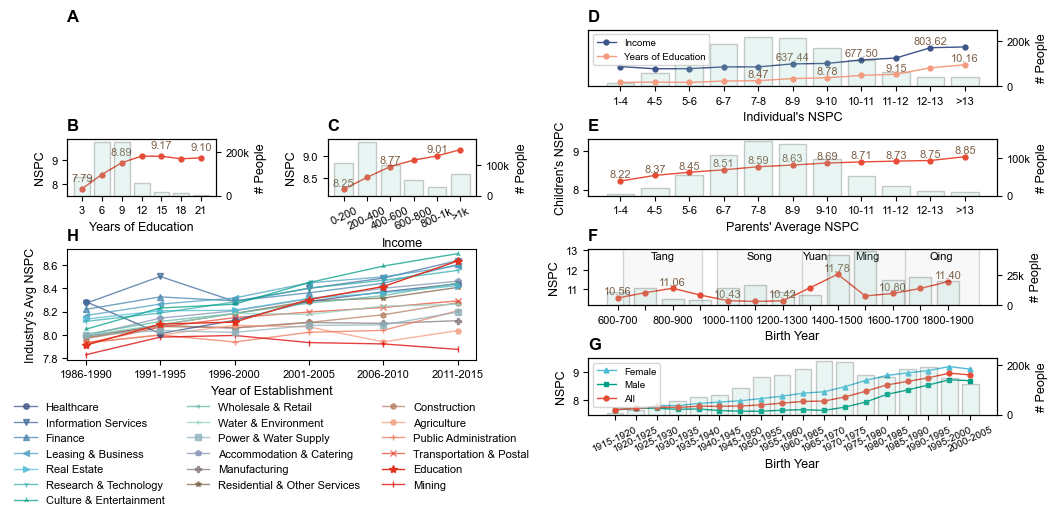

In [767]:
fig = plt.figure(figsize=(12, 5))
label_size = 9
font_size = 8

wspace = 0.75  # Horizontal spacing between subplots
hspace = 30  # Vertical spacing between subplots
# Create a grid of subplots with specified spacing
gs = gridspec.GridSpec(8, 4, wspace=wspace, hspace=hspace)

# Subplot 1: Placeholder subplot
ax1 = plt.subplot(gs[:2, :2])
ax1.axis('off') 
ax1.set_title('A', loc='left', fontweight='bold')

# Subplot 2: Plot B
ax2 = plt.subplot(gs[2:4, :1])
plot_b(ax2)
ax2.set_title('B', loc='left', fontweight='bold')

# Subplot 3: Plot C
ax3 = plt.subplot(gs[2:4, 1:2])
plot_c(ax3)
ax3.set_title('C', loc='left', fontweight='bold')

# Subplot 4: Plot D
ax4 = plt.subplot(gs[:2, 2:])
plot_d(ax4)
ax4.set_title('D', loc='left', fontweight='bold')

# Subplot 5: Plot E
ax5 = plt.subplot(gs[2:4, 2:])
plot_e(ax5)
ax5.set_title('E', loc='left', fontweight='bold')

# Subplot 6: Plot F
ax6 = plt.subplot(gs[4:6, 2:])
plot_f(ax6)
ax6.set_title('F', loc='left', fontweight='bold')

# Subplot 7: Plot G
ax7 = plt.subplot(gs[6:8, 2:])
plot_g(ax7)
ax7.set_title('G', loc='left', fontweight='bold')

# Subplot 8: Plot H
ax8 = plt.subplot(gs[4:7, :2])
plot_h(ax8)
ax8.set_title('H', loc='left', fontweight='bold')

# Adjust the layout and spacing of the subplots
plt.tight_layout(pad=0.1)

# Save the figure as a PDF file
filename = 'combination'
plt.savefig(f'fig/{filename}.pdf', format='pdf', bbox_inches='tight')

# Display the figure
plt.show();